In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare','Survived'])

In [7]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [21]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [22]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

C:\Users\shoab\AppData\Local\Temp\ipykernel_11536\1444409324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace= True)


In [23]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [24]:
df.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [25]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [27]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [28]:
x_test

,Age,Fare
709,29.699118,15.2458
439,31.000000,10.5000
840,20.000000,7.9250
720,6.000000,33.0000
39,14.000000,11.2417
...,...,...
433,17.000000,7.1250
773,29.699118,7.2250
25,38.000000,31.3875
84,17.000000,10.5000


In [29]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [30]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

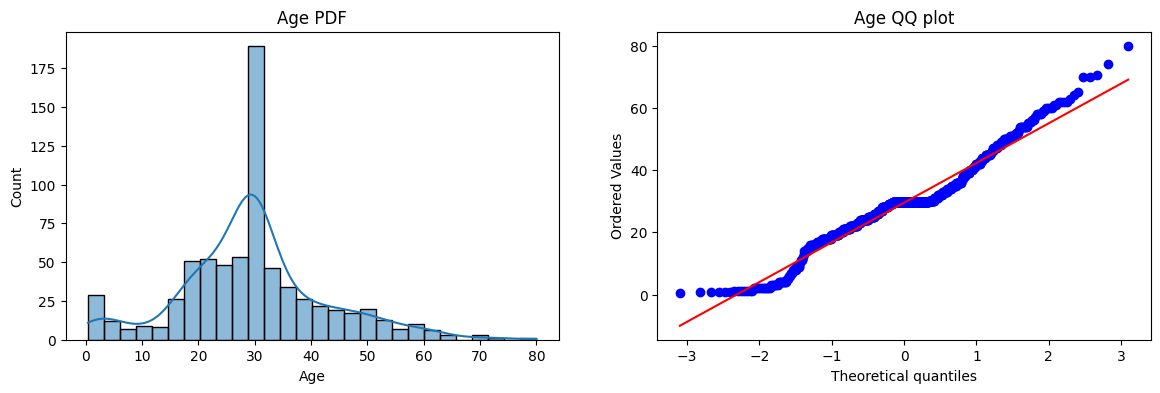

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sn.histplot(x_train['Age'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot = plt)
plt.title('Age QQ plot')
plt.show()

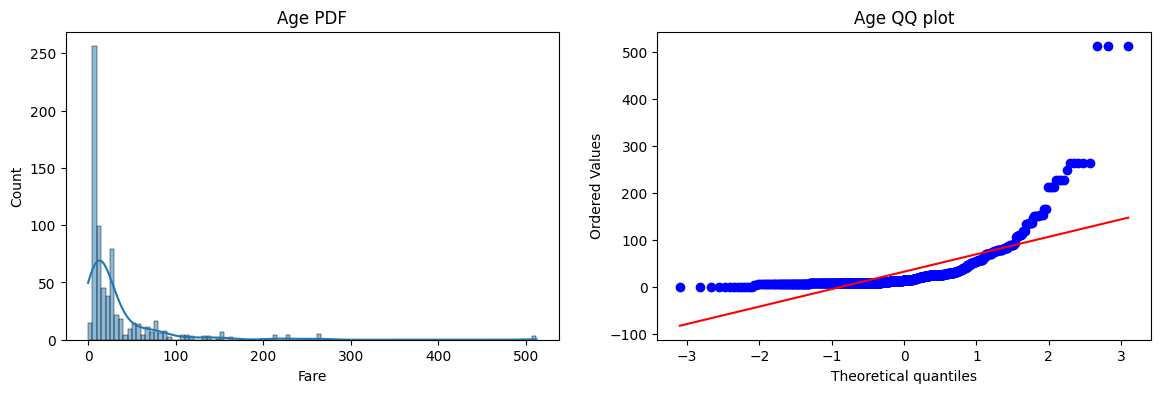

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sn.histplot(x_train['Fare'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot = plt)
plt.title('Age QQ plot')
plt.show()

In [38]:
model = LogisticRegression()
model1 = DecisionTreeClassifier()

In [40]:
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
predict = model.predict(x_test)

In [43]:
predict1 = model1.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, predict)

In [45]:
accuracy1 = accuracy_score(y_test, predict1)

In [46]:
accuracy

0.6480446927374302

In [47]:
accuracy1

0.6871508379888268

In [48]:
trf = FunctionTransformer(func=np.log1p)

In [55]:
x_train_transform = trf.fit_transform(x_train)

In [56]:
x_test_transform = trf.transform(x_test)

In [57]:
model2 = LogisticRegression()

In [58]:
model3 = DecisionTreeClassifier()

In [59]:
model2.fit(x_train_transform, y_train)

LogisticRegression()

In [60]:
predict2 = model2.predict(x_test_transform)

In [61]:
accuracy2 = accuracy_score(y_test, predict2)

In [62]:
accuracy2

0.6815642458100558

In [63]:
model3.fit(x_train_transform, y_train)

DecisionTreeClassifier()

In [64]:
predict3 = model3.predict(x_test_transform)

In [65]:
accuracy3 = accuracy_score(y_test, predict3)

In [66]:
accuracy3

0.6871508379888268

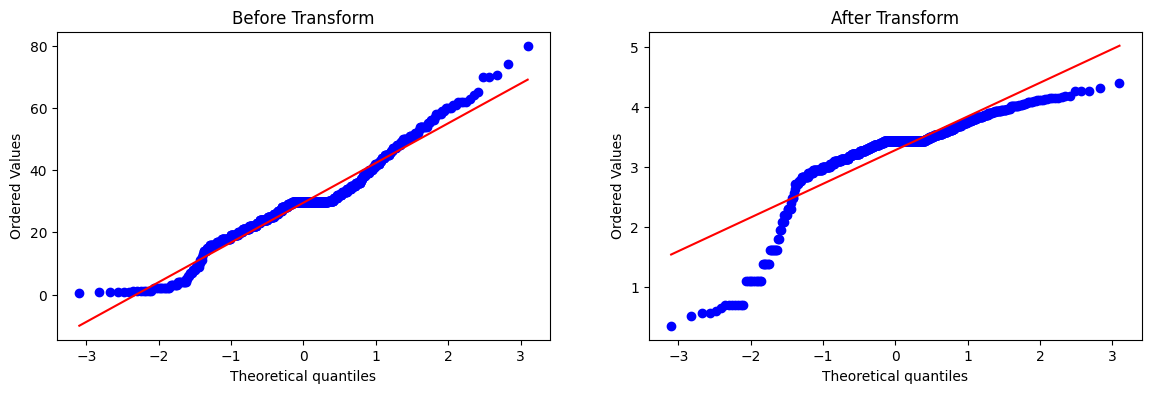

In [75]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot = plt)
plt.title('Before Transform')


plt.subplot(122)
stats.probplot(x_train_transform['Age'], dist="norm", plot = plt)
plt.title('After Transform')
plt.show()

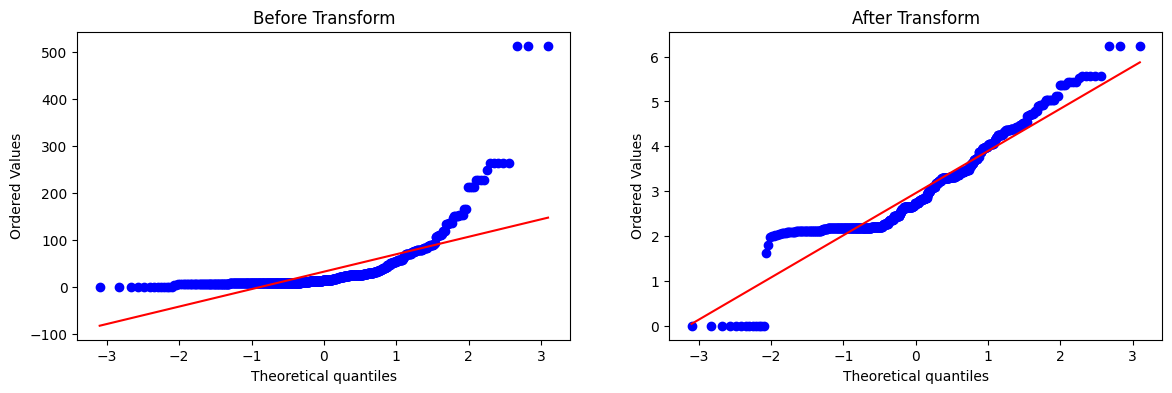

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot = plt)
plt.title('Before Transform')


plt.subplot(122)
stats.probplot(x_train_transform['Fare'], dist="norm", plot = plt)
plt.title('After Transform')
plt.show()

In [81]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=20)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=20)))

LR 0.6771212121212122
DT 0.665479797979798


In [82]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)

In [83]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [84]:
clf.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)
    
y_pred = clf.predict(x_test_transformed2)
y_pred2 = clf2.predict(x_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [85]:
x_transformed2 = trf2.fit_transform(x)



In [87]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed2,y,scoring='accuracy',cv=20)))
print("DT",np.mean(cross_val_score(clf2,x_transformed2,y,scoring='accuracy',cv=20)))

LR 0.6669949494949493
DT 0.6577272727272726


In [88]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


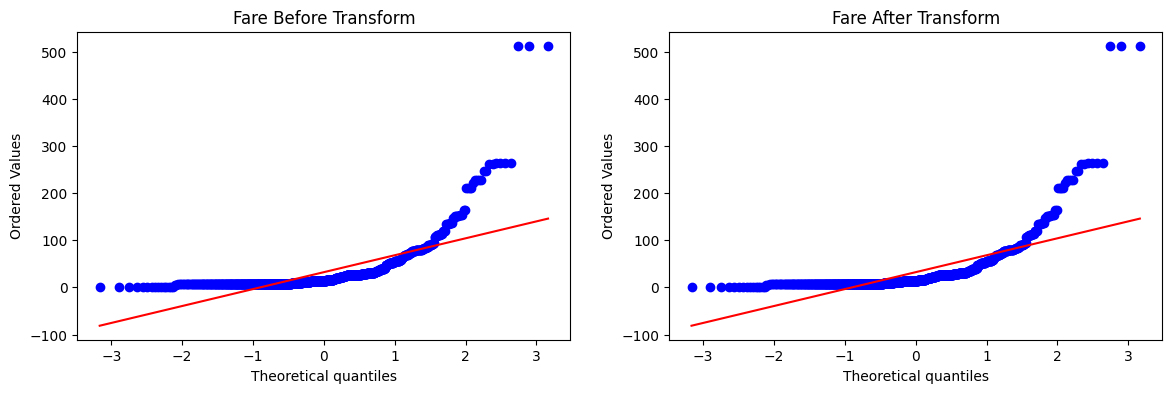

In [89]:
apply_transform(lambda x: x)

Accuracy 0.6589013732833957


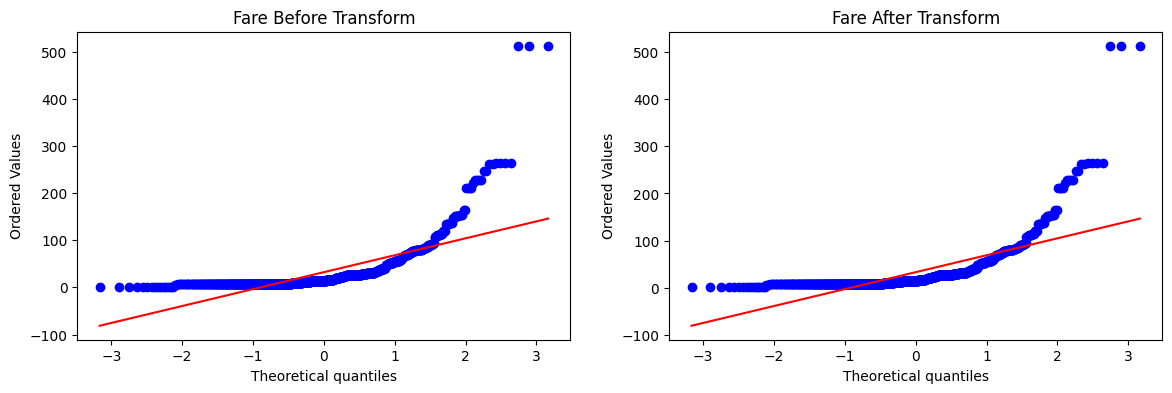

In [92]:
apply_transform(lambda x: 1/1+x)

Accuracy 0.6431335830212235


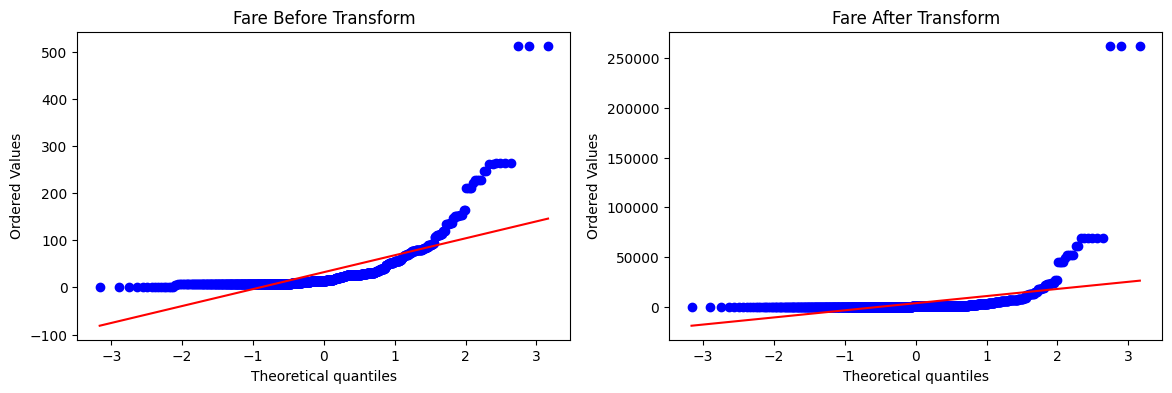

In [93]:
apply_transform(lambda x: x**2)

Accuracy 0.6195131086142323


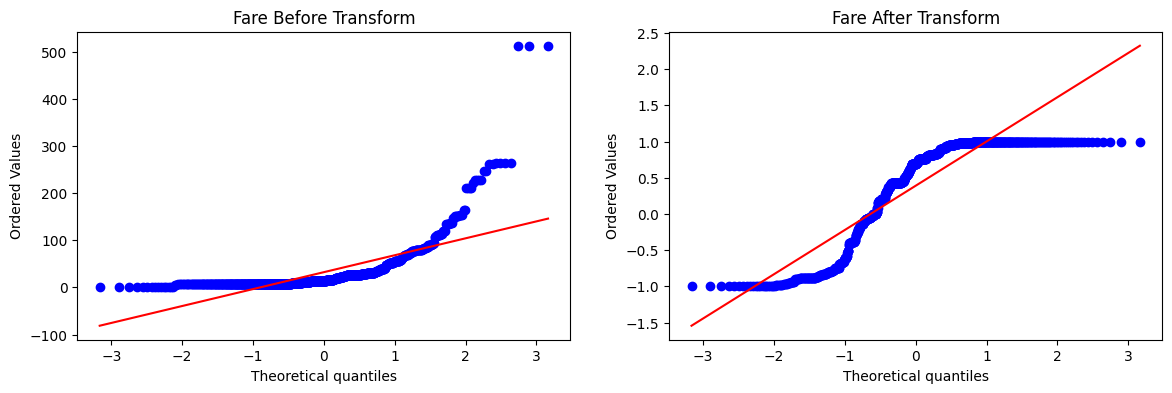

In [94]:
apply_transform(lambda x: np.sin(x))

Accuracy 0.6589013732833957


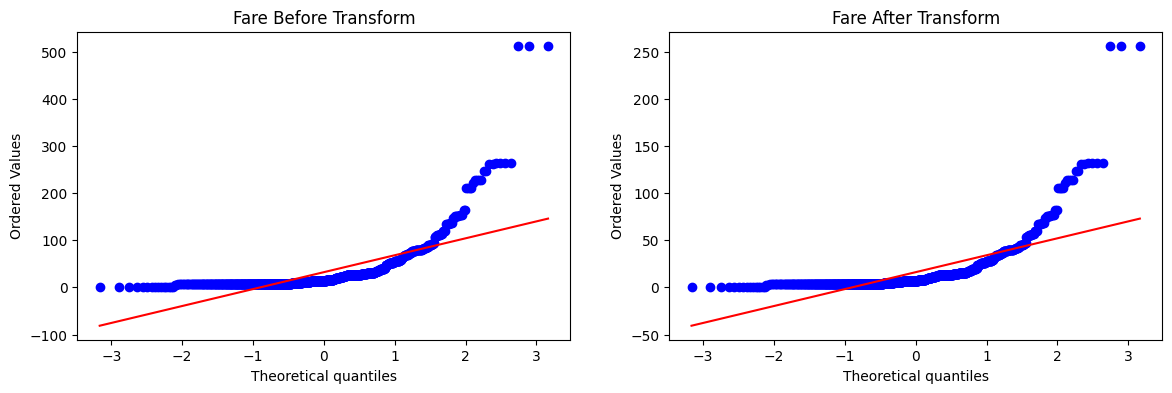

In [95]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


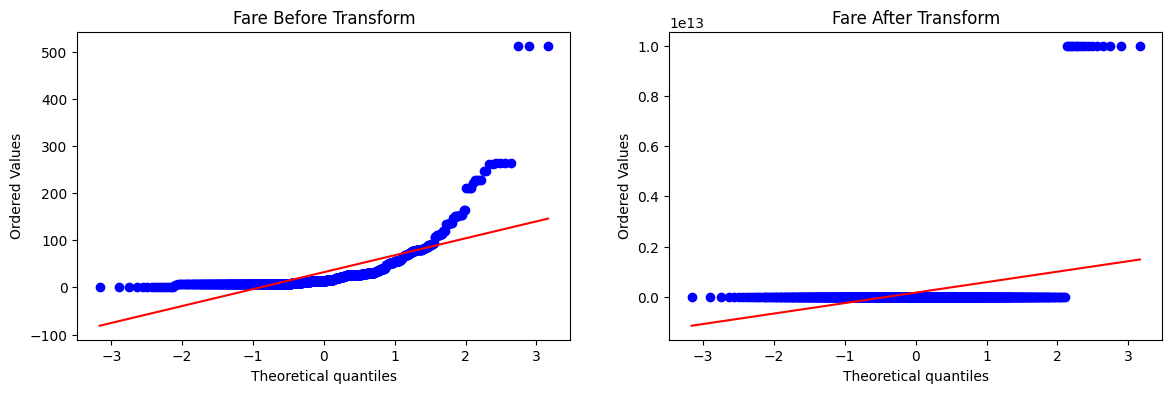

In [106]:
apply_transform(lambda x: 1/(x+0.0000000000001))